## Import Libraries

In [535]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import math

from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error



## Read data from csv file

In [1002]:
# Read a comma-separated values (csv) file into DataFrame
df = pd.read_csv('Melbourne_housing_FULL.csv')

In [1003]:
# Return the first n rows
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


## Exploratory Data Analysis

In [1004]:
# Check number of rows, columns and column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

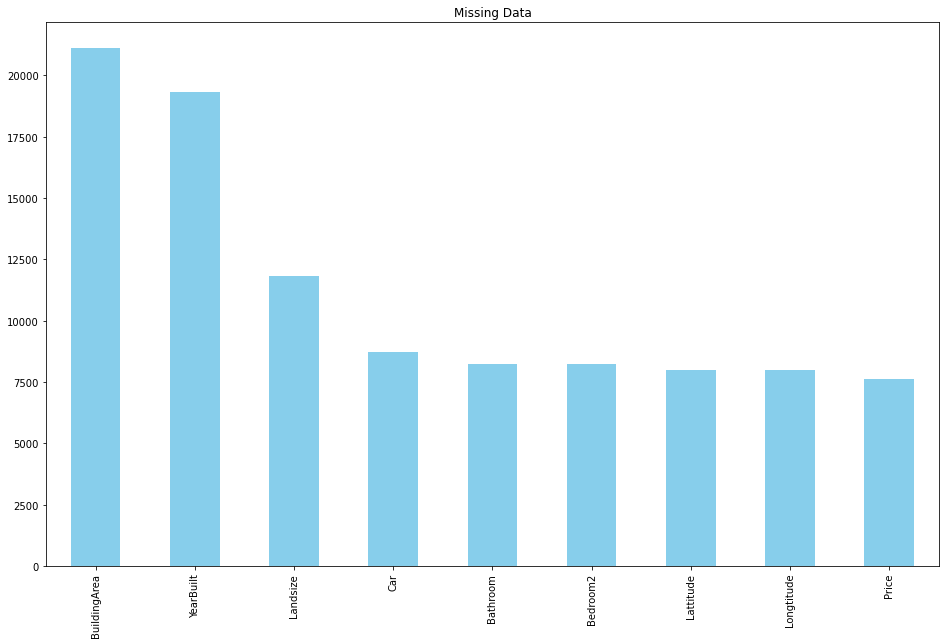

In [1006]:
#checking missing values
plt.figure(figsize = (16,10))
missing = df.isnull().sum()
missing = missing[missing > 5]
missing = missing.sort_values(ascending = False)
missing.plot.bar(color='skyblue')
plt.title('Missing Data');

In [912]:
# Check Null Values
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [913]:
# Generates descriptive statistics.
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


### Data Dictionary

In [914]:
data_dictionary = [('Suburb', 'string', 'Suburb'),
                   ('Address', 'string', 'Address'),
                   ('Rooms', 'int64', 'Number of rooms'),
                   ('Type', 'string', 'h = house,cottage,villa, semi,terrace, u = unit, duplex, t = townhouse, dev site = development site, o res = other residential'),
                   ('Price', 'float64', 'Price in Australian dollars'),
                   ('Method', 'string', 'S = property sold, SP = property sold prior, PI = property passed in, PN = sold prior not disclosed, SN = sold not disclosed, NB = no bid, VB = vendor bid, W = withdrawn prior to auction, SA = sold after auction, SS = sold after auction price not disclosed, N/A = price or highest bid not available'),
                   ('SellerG', 'string', 'Real estate agents name'),
                   ('Date', 'datetime64', 'Date sold'),
                   ('Distance', 'float64', 'Distance from Cetral Business District (CBD) in Kilometres'),
                   ('Postcode', 'float64', 'Post code'),
                   ('Bedroom2', 'float64', 'Number of bedrooms'),
                   ('Bathroom', 'float64', 'Number of bathrooms'),
                   ('Car', 'float64', 'Number of parking slots'),
                   ('Landsize', 'float64', 'Land Size in metres'),
                   ('BuildingArea', 'float64', 'Building size in metres'),
                   ('YearBuilt', 'float64', 'Year the house was built'),
                   ('CouncilArea', 'string', 'Governing council for the area'),
                   ('Lattitude', 'float64', 'Latitude'),
                   ('Longtitude', 'float64', 'Longitude'),
                   ('Regionname', 'string', 'General region (West, North West, North, North east …etc)'),
                   ('Propertycount', 'float64', 'Number of property'),]

In [915]:
# Creates Data frame for the data dictionary
dd = pd.DataFrame(data_dictionary, columns=['Column Name', 'Column Type', 'Brief Description'])
pd.set_option('max_colwidth', None)
dd.head(21)

,Column Name,Column Type,Brief Description
0,Suburb,string,Suburb
1,Address,string,Address
2,Rooms,int64,Number of rooms
3,Type,string,"h = house,cottage,villa, semi,terrace, u = unit, duplex, t = townhouse, dev site = development site, o res = other residential"
4,Price,float64,Price in Australian dollars
5,Method,string,"S = property sold, SP = property sold prior, PI = property passed in, PN = sold prior not disclosed, SN = sold not disclosed, NB = no bid, VB = vendor bid, W = withdrawn prior to auction, SA = sold after auction, SS = sold after auction price not disclosed, N/A = price or highest bid not available"
6,SellerG,string,Real estate agents name
7,Date,datetime64,Date sold
8,Distance,float64,Distance from Cetral Business District (CBD) in Kilometres
9,Postcode,float64,Post code


### Data Cleaning

In [916]:
# Dropping Columns with more than 10k null values and duplicate columns
df = df.drop(columns=['Landsize', 'BuildingArea','YearBuilt','Bedroom2','Propertycount'])

In [917]:
# For the type column, replace h with House, u with Unit and t with Townhouse
df['Type'] = df['Type'].replace({'h':'House', 'u':'Unit', 't':'Townhouse'})

In [918]:
# Return a Series containing counts of unique values
df['Type'].value_counts()

House        23980
Unit          7297
Townhouse     3580
Name: Type, dtype: int64

In [919]:
# For the method column, replace with appropraite values from data dictionary
df['Method'] = df['Method'].replace({'S':'Property Sold', 
                                     'SP':'Property Sold Prior', 
                                     'PI':'Property Passed In',
                                     'VB':'Vendor Bid',
                                     'SN':'Sold, Price Not Disclosed',
                                    'PN':'Sold Prior, Price Not Disclosed',
                                    'SA':'Sold After Auction',
                                    'W':'Withdrawn Prior To Auction',
                                    'SS':'Sold After Auction, Price Not Disclosed'})

In [920]:
# Return a Series containing counts of unique values
df['Method'].value_counts()

Property Sold                              19744
Property Sold Prior                         5095
Property Passed In                          4850
Vendor Bid                                  3108
Sold, Price Not Disclosed                   1317
Sold Prior, Price Not Disclosed              308
Sold After Auction                           226
Withdrawn Prior To Auction                   173
Sold After Auction, Price Not Disclosed       36
Name: Method, dtype: int64

In [921]:
# Drop rows with properties where price has not been disclosed
df = df[df["Method"].str.contains("Sold, Price Not Disclosed") == False]
df = df[df["Method"].str.contains("Sold Prior, Price Not Disclosed") == False]
df = df[df["Method"].str.contains("Sold After Auction, Price Not Disclosed") == False]
df = df[df["Method"].str.contains("Withdrawn Prior To Auction") == False]

In [922]:
# Replace remaining null values in price column with mean
df['Price'].fillna(round(df["Price"].mean(),0), inplace=True)

In [923]:
# Replace remaining null values in Distance column with mean
df['Distance'].fillna(round(df["Distance"].mean(),1), inplace=True)

In [924]:
# Drop only null value in the post code column
df.dropna(subset=['Postcode'], how='all', inplace=True)

In [925]:
# Drop null values in the bathroom column
# This would automatically get rid of nulls in other columns such as Car and Price
df.dropna(subset=['Bathroom'], how='all', inplace=True)

In [926]:
# Replace remaining null values in bathroom column with mean
df['Bathroom'].fillna(round(df["Bathroom"].mean(),0), inplace=True)

In [927]:
# Replace remaining null values in Car column with mean
df['Car'].fillna(round(df["Car"].mean(),0), inplace=True)

In [928]:
# Drop null values in the latutide and longitude column
df.dropna(subset=['Lattitude'], how='all', inplace=True)
df.dropna(subset=['Longtitude'], how='all', inplace=True)

In [929]:
# Remaining Nulls
df.isnull().sum()

Suburb         0
Address        0
Rooms          0
Type           0
Price          0
Method         0
SellerG        0
Date           0
Distance       0
Postcode       0
Bathroom       0
Car            0
CouncilArea    0
Lattitude      0
Longtitude     0
Regionname     0
dtype: int64

In [930]:
# Unique Values in each column
df.nunique( )

Suburb           340
Address        24549
Rooms             12
Type               3
Price           2607
Method             5
SellerG          343
Date              78
Distance         213
Postcode         209
Bathroom          11
Car               15
CouncilArea       33
Lattitude      12822
Longtitude     13831
Regionname         8
dtype: int64

## Analysing the distribution of the target variable

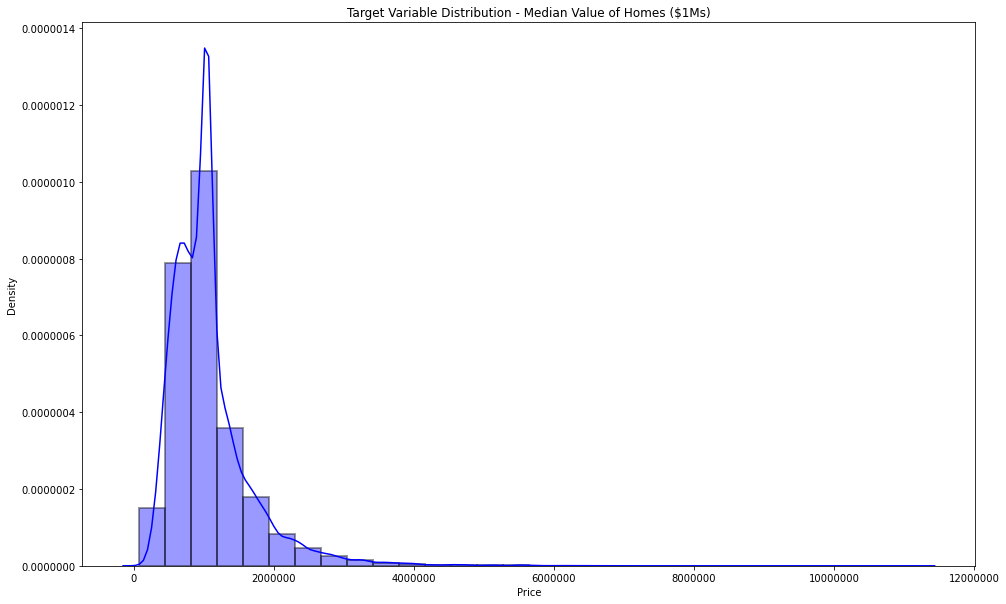

In [931]:
# Price is not normal
plt.figure(figsize=[16,10])
sns.distplot(df['Price'], color='blue',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.ticklabel_format(style='plain')
plt.show()

In [875]:
# Over view of cleaned dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25143 entries, 1 to 34856
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Suburb       25143 non-null  object 
 1   Address      25143 non-null  object 
 2   Rooms        25143 non-null  int64  
 3   Type         25143 non-null  object 
 4   Price        25143 non-null  float64
 5   Method       25143 non-null  object 
 6   SellerG      25143 non-null  object 
 7   Date         25143 non-null  object 
 8   Distance     25143 non-null  float64
 9   Postcode     25143 non-null  float64
 10  Bathroom     25143 non-null  float64
 11  Car          25143 non-null  float64
 12  CouncilArea  25143 non-null  object 
 13  Lattitude    25143 non-null  float64
 14  Longtitude   25143 non-null  float64
 15  Regionname   25143 non-null  object 
dtypes: float64(7), int64(1), object(8)
memory usage: 3.3+ MB


In [932]:
# Correlation of all columns in the dataframe
df.corr()

,Rooms,Price,Distance,Postcode,Bathroom,Car,Lattitude,Longtitude
Rooms,1.000000,0.396158,0.269722,0.085791,0.611557,0.388450,0.006141,0.103807
Price,0.396158,1.000000,-0.215055,0.031713,0.376948,0.180014,-0.198150,0.180286
Distance,0.269722,-0.215055,1.000000,0.489074,0.130786,0.235890,-0.098476,0.201749
Postcode,0.085791,0.031713,0.489074,1.000000,0.121206,0.065595,-0.230059,0.363254
Bathroom,0.611557,0.376948,0.130786,0.121206,1.000000,0.303102,-0.057155,0.107677
Car,0.388450,0.180014,0.235890,0.065595,0.303102,1.000000,-0.007840,0.046715
Lattitude,0.006141,-0.198150,-0.098476,-0.230059,-0.057155,-0.007840,1.000000,-0.346665
Longtitude,0.103807,0.180286,0.201749,0.363254,0.107677,0.046715,-0.346665,1.000000


<AxesSubplot:>

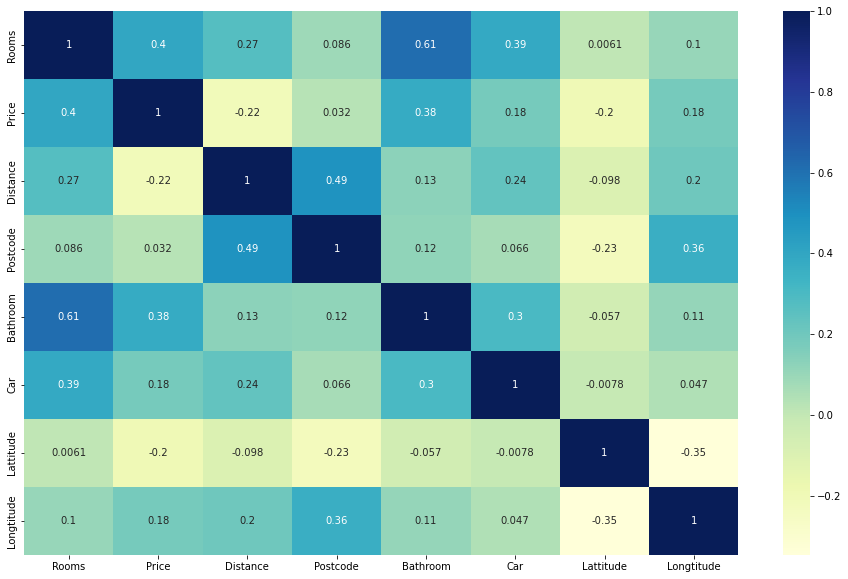

In [933]:
# Co-relation heat map
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

<AxesSubplot:title={'center':'Target Variable Distribution - Median Value of Homes ($1Ms)'}, xlabel='Rooms', ylabel='Price'>

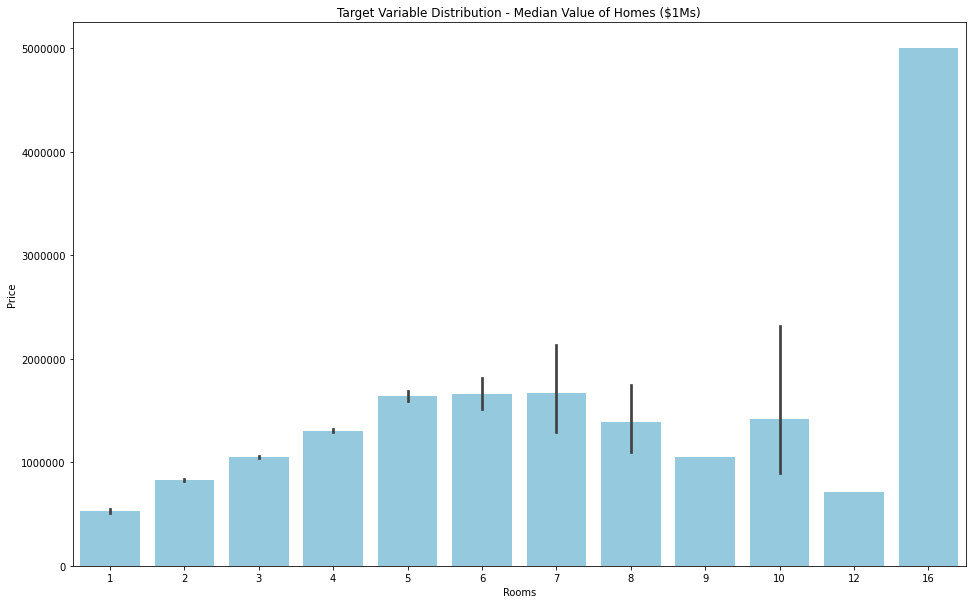

In [999]:
# Average price for houses along their number of bedrooms:
plt.figure(figsize=(16,10))
plt.ticklabel_format(style='plain')
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
sns.barplot(x=df.Rooms, y=df['Price'], color='skyblue')

In [935]:
# Price breakdown for each bedroom group
by_bedroom = df.groupby(['Rooms']).Price.agg([len, min, max])
by_bedroom

,len,min,max
Rooms,,,
1,900,85000.0,2450000.0
2,5401,190000.0,4800000.0
3,11135,283000.0,9000000.0
4,6122,131000.0,11200000.0
5,1371,355000.0,8000000.0
6,168,506000.0,6500000.0
7,24,780000.0,5450000.0
8,15,741000.0,2950000.0
9,2,1050173.0,1050173.0


In [679]:
# Save cleaned data for Power Bi visualistaions
df.to_csv('cleaned_data.csv')

## Data Modelling

In [936]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,CouncilArea,Lattitude,Longtitude,Regionname
1,Abbotsford,85 Turner St,2,House,1480000.0,Property Sold,Biggin,3/12/2016,2.5,3067.0,1.0,1.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan
2,Abbotsford,25 Bloomburg St,2,House,1035000.0,Property Sold,Biggin,4/02/2016,2.5,3067.0,1.0,0.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan
3,Abbotsford,18/659 Victoria St,3,Unit,1050173.0,Vendor Bid,Rounds,4/02/2016,2.5,3067.0,2.0,1.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan
4,Abbotsford,5 Charles St,3,House,1465000.0,Property Sold Prior,Biggin,4/03/2017,2.5,3067.0,2.0,0.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan
5,Abbotsford,40 Federation La,3,House,850000.0,Property Passed In,Biggin,4/03/2017,2.5,3067.0,2.0,1.0,Yarra City Council,-37.7969,144.9969,Northern Metropolitan


In [937]:
# Converts data type to category and then label encodes it

df.Suburb = df.Suburb.astype("category")
df.Suburb = df.Suburb.cat.codes

df.Address = df.Address.astype("category")
df.Address = df.Address.cat.codes

df.Type = df.Type.astype("category")
df.Type = df.Type.cat.codes

df.Method = df.Method.astype("category")
df.Method = df.Method.cat.codes

df.SellerG = df.SellerG.astype("category")
df.SellerG = df.SellerG.cat.codes

df.CouncilArea = df.CouncilArea.astype("category")
df.CouncilArea = df.CouncilArea.cat.codes

df.Regionname = df.Regionname.astype("category")
df.Regionname = df.Regionname.cat.codes

df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,CouncilArea,Lattitude,Longtitude,Regionname
1,0,23415,2,0,1480000.0,1,28,3/12/2016,2.5,3067.0,1.0,1.0,31,-37.7996,144.9984,2
2,0,10762,2,0,1035000.0,1,28,4/02/2016,2.5,3067.0,1.0,0.0,31,-37.8079,144.9934,2
3,0,6945,3,2,1050173.0,4,267,4/02/2016,2.5,3067.0,2.0,1.0,31,-37.8114,145.0116,2
4,0,17858,3,0,1465000.0,2,28,4/03/2017,2.5,3067.0,2.0,0.0,31,-37.8093,144.9944,2
5,0,16333,3,0,850000.0,0,28,4/03/2017,2.5,3067.0,2.0,1.0,31,-37.7969,144.9969,2


<AxesSubplot:>

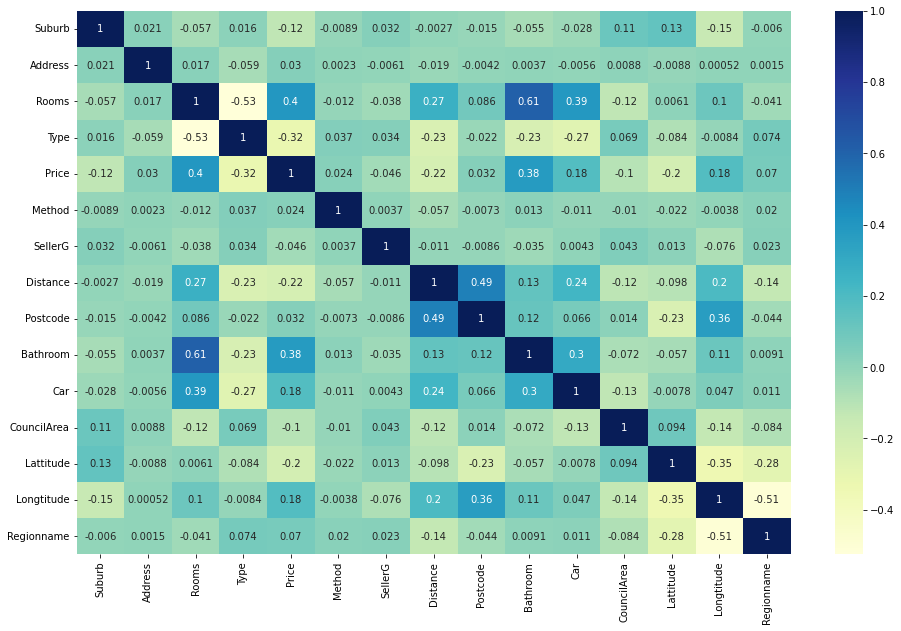

In [938]:
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

## Test1:The only 2 columns with some co-relation with price are Rooms and Bathroom.

In [892]:
# Independent variables
# Only good co-relations are Rooms and Bathrooms
X = df.loc[:,['Rooms',
              'Bathroom',]]

# Dependent variable
y = df.loc[:,['Price']]

In [893]:
# Separate y and X into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

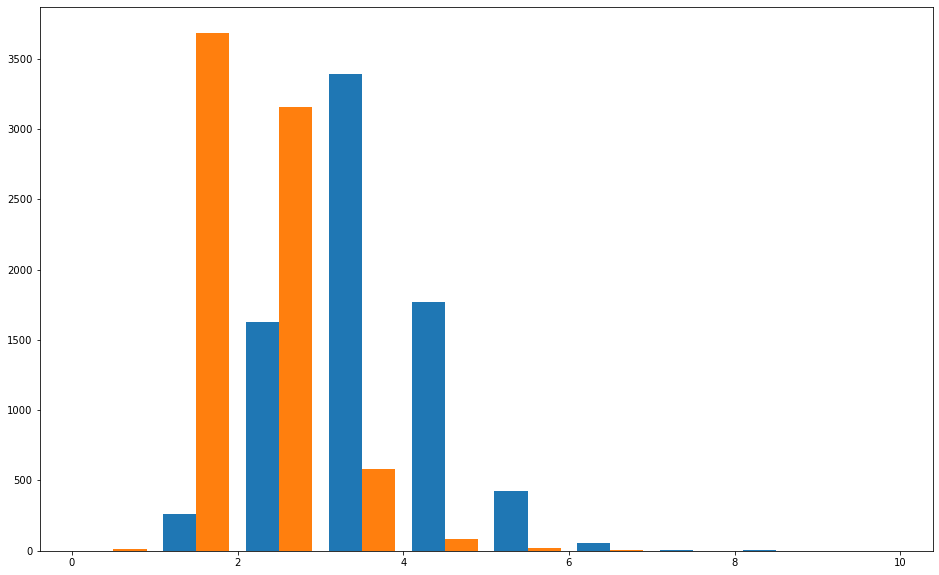

In [894]:
# Examination before standardising information
plt.figure(figsize=(16,10))
plt.hist(X_test);

In [896]:
# Define model

mlr = LinearRegression()
mlr.fit(X_train,y_train)

# Predictor variable
pred = mlr.predict(X_test)

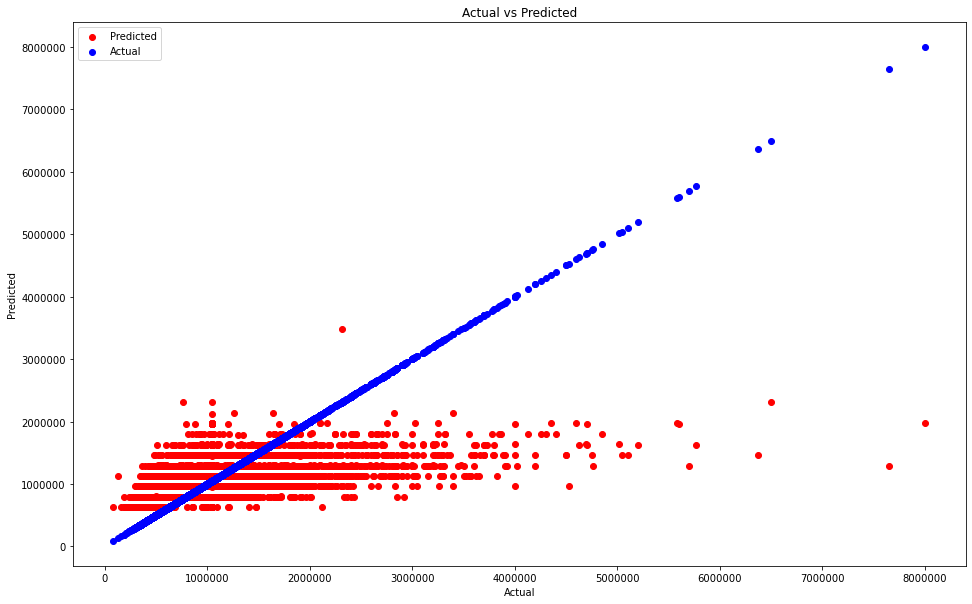

In [899]:
# Plot predicted values on one axis and the real values on the other axis
plt.figure(figsize=(16,10))
plt.ticklabel_format(style='plain')
plt.scatter(y_test, pred, color = 'red')
plt.scatter(y_test, y_test, color = 'blue')


plt.title(label='Actual vs Predicted')
plt.xlabel(xlabel='Actual')
plt.ylabel(ylabel='Predicted')
plt.legend(['Predicted', 'Actual'],loc="upper left")

In [900]:
# R^2 values
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.18975304763875656

In [609]:
# Import metrics from sklearn 
from sklearn import metrics

# MAE MSE and RMSE.

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 371714.18926275044
MSE: 289415795449.7357
RMSE: 537973.7869541004


## Test2: Decided to use all columns except Date because of the poor R2 score.

In [947]:
# Independent variables
# Only good co-relations are Rooms and Bathrooms
X = df.loc[:,['Suburb',
              'Address',
              'Rooms',
              'Type',
              'Method',
              'SellerG',
              'Distance',
              'Postcode',
              'Bathroom',
              'Car',
              'CouncilArea',
              'Lattitude',
              'Longtitude',
              'Regionname']]

# Dependent variable
y = df.loc[:,['Price']]

In [948]:
# Separate y and X into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

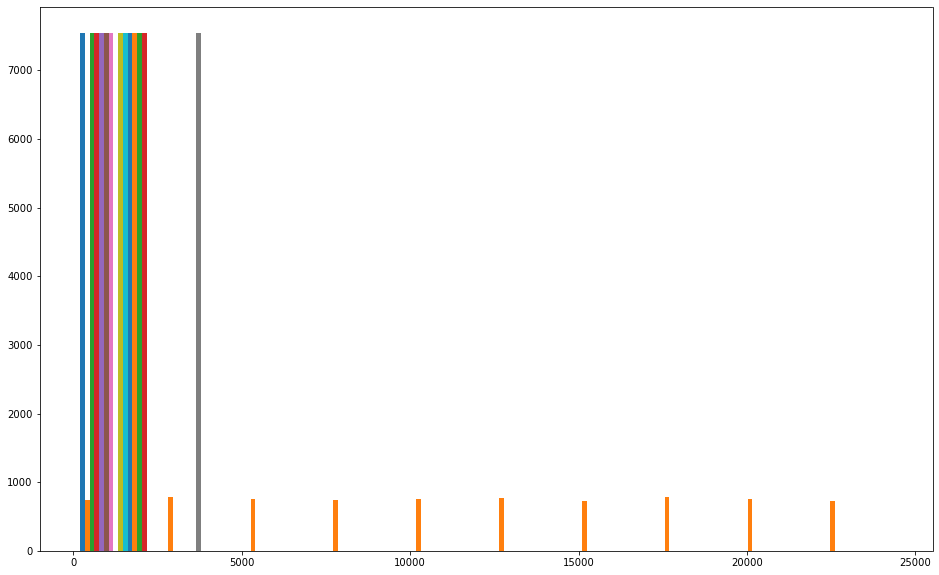

In [949]:
# Examination before Normalising/standardisation information
plt.figure(figsize=(16,10))
plt.hist(X_test);

In [950]:
# Define model
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
sc_X.fit(X_train)

X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

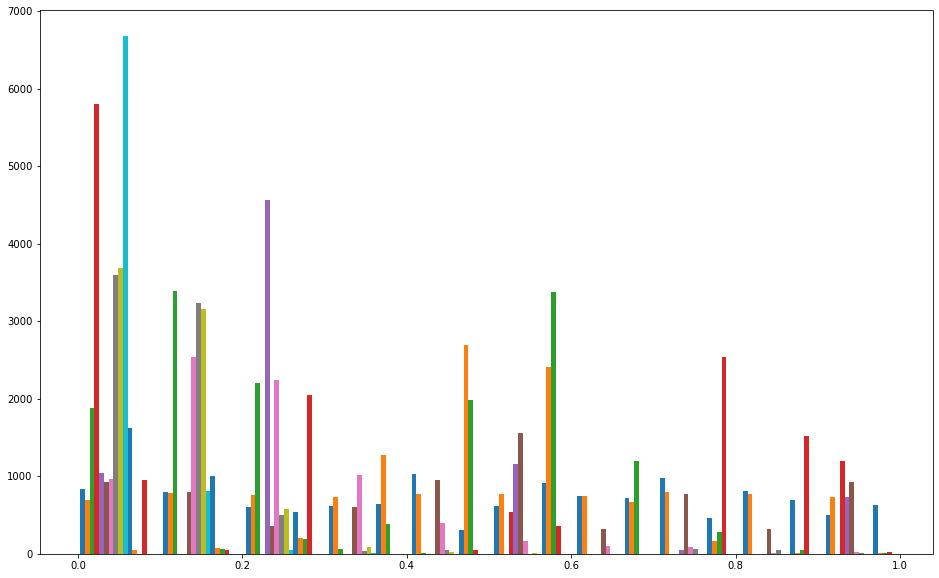

In [951]:
# Examining Normalised information
plt.figure(figsize=(16,10))
plt.hist(X_test);

In [952]:
# Define model

mlr = LinearRegression()
mlr.fit(X_train,y_train)

# Predictor variable
pred = mlr.predict(X_test)

In [953]:
# Define model

mlr = LinearRegression()
mlr.fit(X_train,y_train)

# Predictor variable
pred = mlr.predict(X_test)

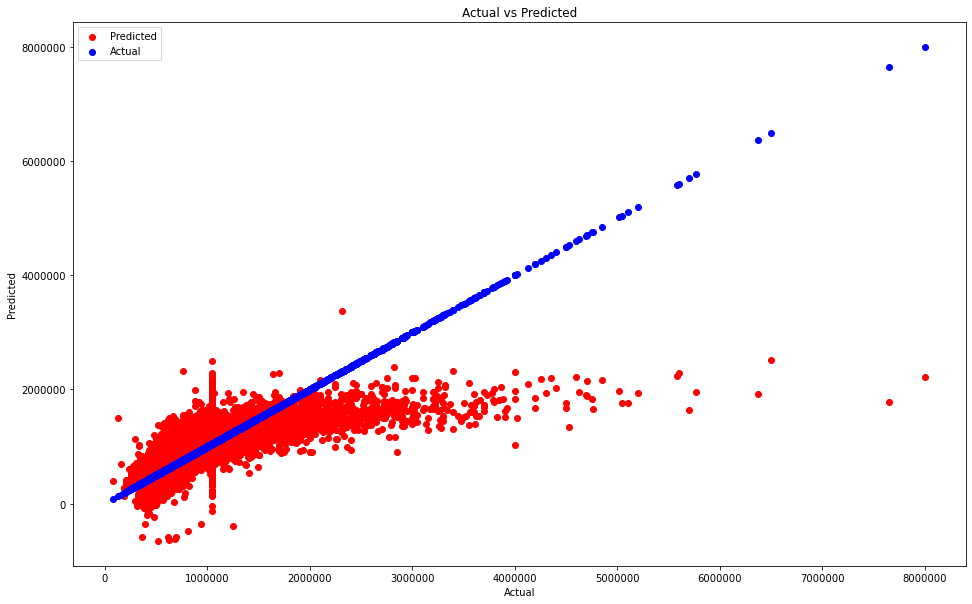

In [955]:
# Plot predicted values on one axis and the real values on the other axis
plt.figure(figsize=(16,10))
plt.ticklabel_format(style='plain')
plt.scatter(y_test, pred, color = 'red')
plt.scatter(y_test, y_test, color = 'blue')

plt.title(label='Actual vs Predicted')
plt.xlabel(xlabel='Actual')
plt.ylabel(ylabel='Predicted')
plt.legend(['Predicted', 'Actual'],loc="upper left")

In [956]:
# R^2 values
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.42872193529472924

In [641]:
# Import metrics from sklearn 
from sklearn import metrics

# MAE MSE and RMSE.

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 296256.03077649744
MSE: 204057411185.35812
RMSE: 451727.14240496786


## Decided to remove houses with more than 5 bedrooms as they only comprise of 214 rows out of the 25k rows of data.

In [983]:
# Remove houses with more than 6 rooms
df2 = df.drop(df.index[df['Rooms'].isin([6,7,8,9,10,12,16])])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24929 entries, 1 to 34856
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Suburb       24929 non-null  int16  
 1   Address      24929 non-null  int16  
 2   Rooms        24929 non-null  int64  
 3   Type         24929 non-null  int8   
 4   Price        24929 non-null  float64
 5   Method       24929 non-null  int8   
 6   SellerG      24929 non-null  int16  
 7   Date         24929 non-null  object 
 8   Distance     24929 non-null  float64
 9   Postcode     24929 non-null  float64
 10  Bathroom     24929 non-null  float64
 11  Car          24929 non-null  float64
 12  CouncilArea  24929 non-null  int8   
 13  Lattitude    24929 non-null  float64
 14  Longtitude   24929 non-null  float64
 15  Regionname   24929 non-null  int8   
dtypes: float64(7), int16(3), int64(1), int8(4), object(1)
memory usage: 2.1+ MB


<AxesSubplot:xlabel='Rooms', ylabel='Price'>

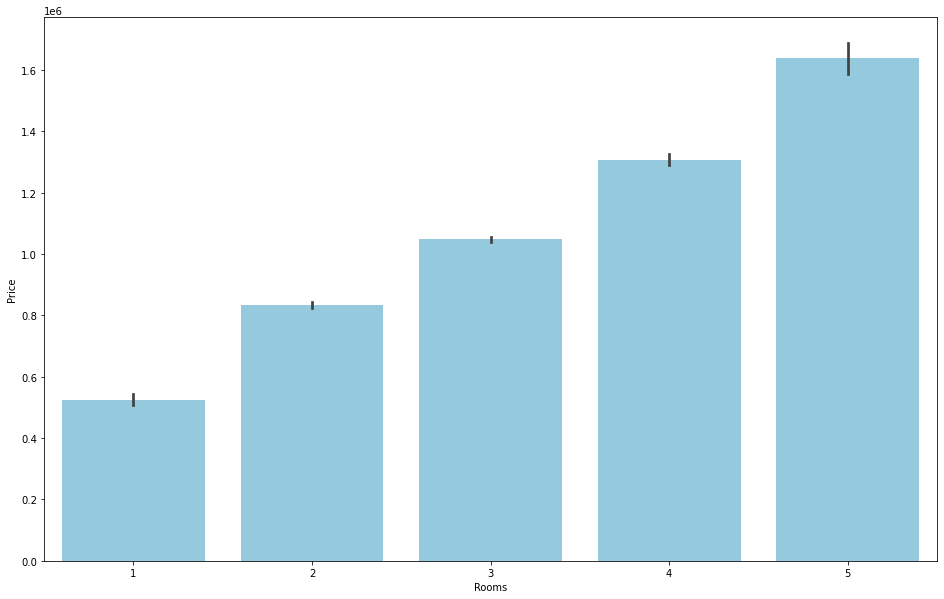

In [1007]:
plt.figure(figsize=(16,10))
sns.barplot(x=df2.Rooms, y=df2['Price'],color='skyblue')

In [985]:
# Converts data type to category and then label encodes it

df2.Suburb = df2.Suburb.astype("category")
df2.Suburb = df2.Suburb.cat.codes

df2.Address = df2.Address.astype("category")
df2.Address = df2.Address.cat.codes

df2.Type = df2.Type.astype("category")
df2.Type = df2.Type.cat.codes

df2.Method = df2.Method.astype("category")
df2.Method = df2.Method.cat.codes

df2.SellerG = df2.SellerG.astype("category")
df2.SellerG = df2.SellerG.cat.codes

df2.CouncilArea = df2.CouncilArea.astype("category")
df2.CouncilArea = df2.CouncilArea.cat.codes

df2.Regionname = df2.Regionname.astype("category")
df2.Regionname = df2.Regionname.cat.codes

df2.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,CouncilArea,Lattitude,Longtitude,Regionname
1,0,23223,2,0,1480000.0,1,28,3/12/2016,2.5,3067.0,1.0,1.0,31,-37.7996,144.9984,2
2,0,10660,2,0,1035000.0,1,28,4/02/2016,2.5,3067.0,1.0,0.0,31,-37.8079,144.9934,2
3,0,6879,3,2,1050173.0,4,266,4/02/2016,2.5,3067.0,2.0,1.0,31,-37.8114,145.0116,2
4,0,17704,3,0,1465000.0,2,28,4/03/2017,2.5,3067.0,2.0,0.0,31,-37.8093,144.9944,2
5,0,16196,3,0,850000.0,0,28,4/03/2017,2.5,3067.0,2.0,1.0,31,-37.7969,144.9969,2


## Test3: Again only used the rooms and bathroom column due to their co-relation to price.

In [969]:
# Independent variables
# Only good co-relations are Rooms and Bathrooms
X = df2.loc[:,['Rooms',
              'Bathroom',]]

# Dependent variable
y = df2.loc[:,['Price']]

In [970]:
# Separate y and X into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


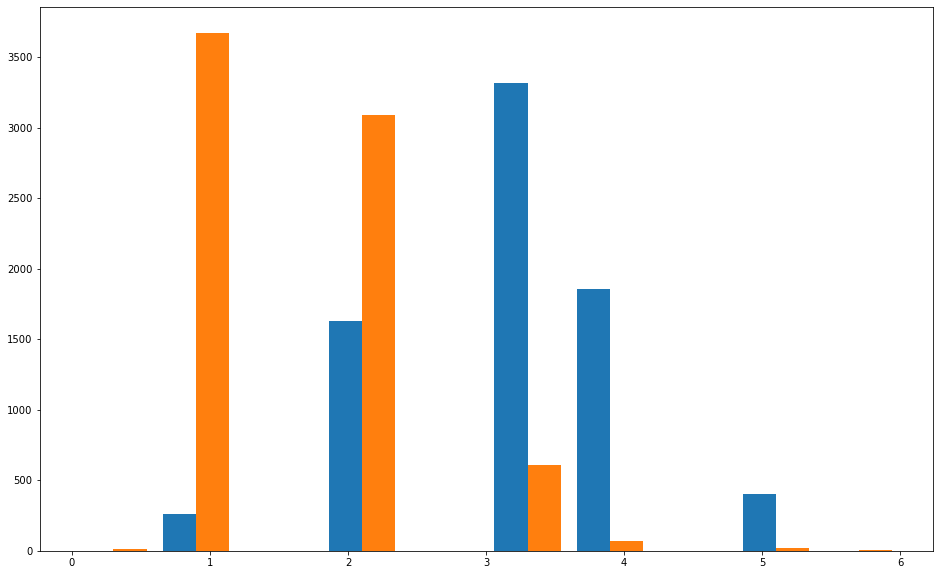

In [971]:
# Examination before standardising information
plt.figure(figsize = (16,10))
plt.hist(X_test);

In [967]:
# Create a standardscaler() object
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler ()
sc_X.fit(X_train)

X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)


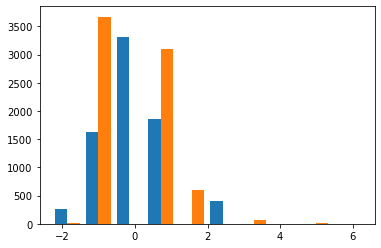

In [968]:
# Examining standardised information
plt.hist(X_test);


In [972]:
# Define model

mlr = LinearRegression()
mlr.fit(X_train,y_train)

# Predictor variable
pred = mlr.predict(X_test)

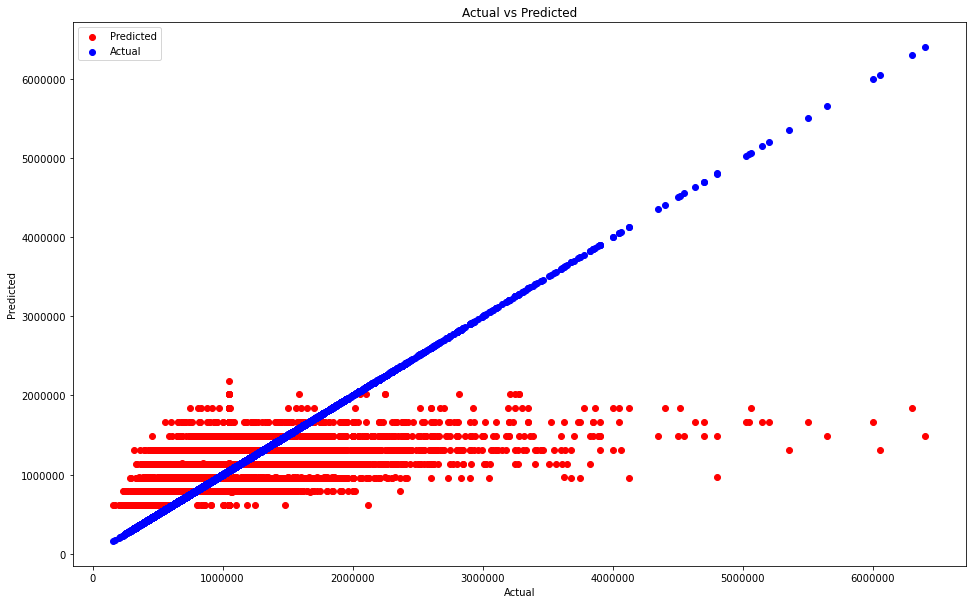

In [973]:


# Plot predicted values on one axis and the real values on the other axis
plt.figure(figsize=(16,10))
plt.ticklabel_format(style='plain')
plt.scatter(y_test, pred, color = 'red')
plt.scatter(y_test, y_test, color = 'blue')

plt.title(label='Actual vs Predicted')
plt.xlabel(xlabel='Actual')
plt.ylabel(ylabel='Predicted')
plt.legend(['Predicted', 'Actual'],loc="upper left")


In [974]:
# R^2 values
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.19708712897035996

## Test4: Using All columns

In [975]:
# Independent variables
# Only good co-relations are Rooms and Bathrooms
X = df2.loc[:,['Suburb',
              'Address',
              'Rooms',
              'Type',
              'Method',
              'SellerG',
              'Distance',
              'Postcode',
              'Bathroom',
              'Car',
              'CouncilArea',
              'Lattitude',
              'Longtitude',
              'Regionname']]

# Dependent variable
y = df2.loc[:,['Price']]

In [976]:
# Separate y and X into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

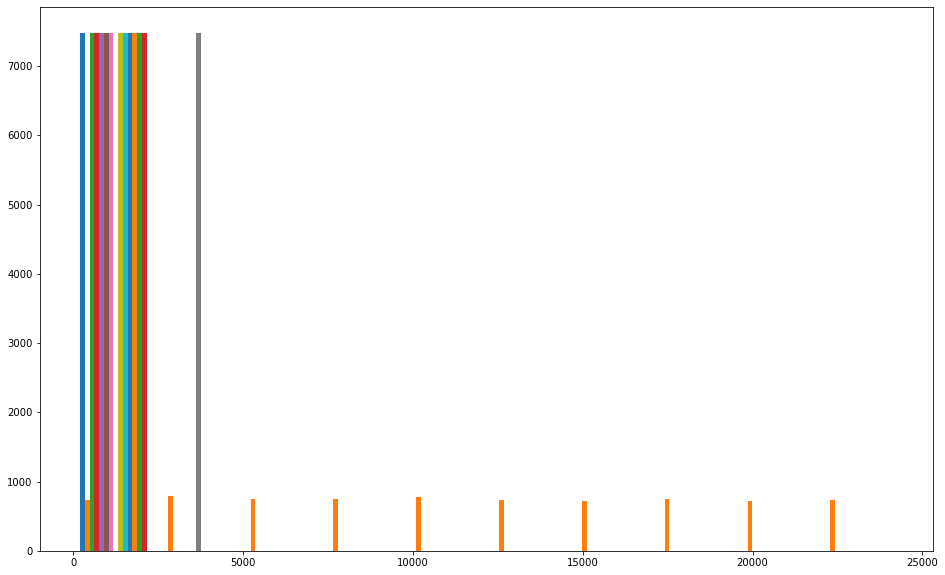

In [977]:
# Examination before standardising information
plt.figure(figsize=(16,10))
plt.hist(X_test);

In [978]:
# Define model
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
sc_X.fit(X_train)

X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

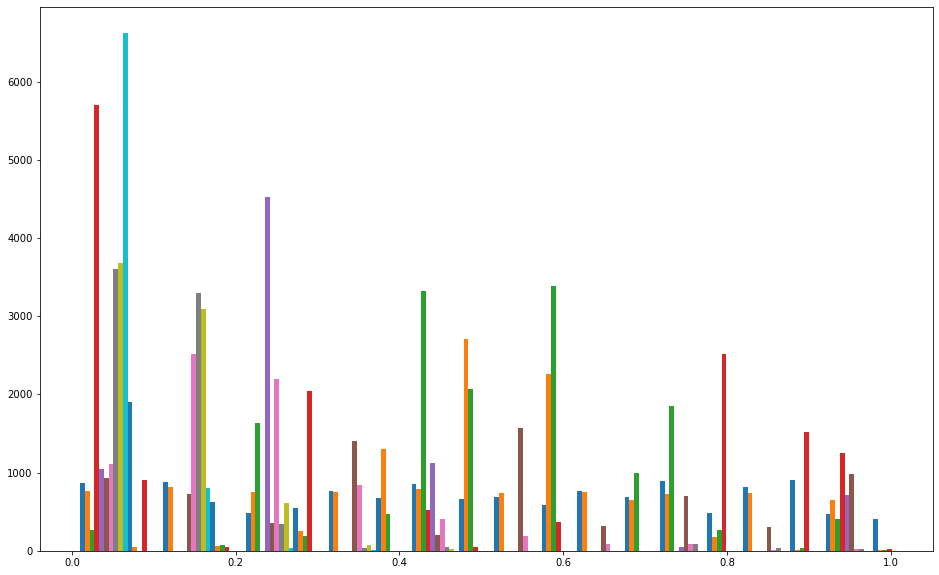

In [979]:
# Examining normalised information
plt.figure(figsize=(16,10))
plt.hist(X_test);


In [980]:
# Define model

mlr = LinearRegression()
mlr.fit(X_train,y_train)

# Predictor variable
pred = mlr.predict(X_test)

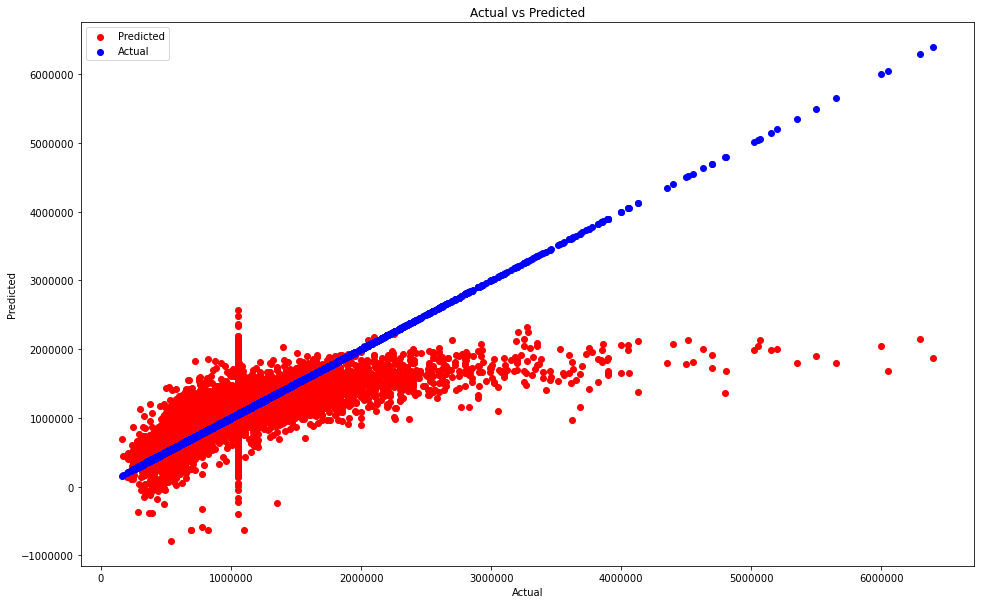

In [981]:
# Plot predicted values on one axis and the real values on the other axis
plt.figure(figsize=(16,10))
plt.ticklabel_format(style='plain')
plt.scatter(y_test, pred, color = 'red')
plt.scatter(y_test, y_test, color = 'blue')

plt.title(label='Actual vs Predicted')
plt.xlabel(xlabel='Actual')
plt.ylabel(ylabel='Predicted')
plt.legend(['Predicted', 'Actual'],loc="upper left")

In [982]:
# R^2 values
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.43830440207031796

## Created a comparison table of R2 scores after each test run in power point